In [20]:
import pandas as pd

import numpy as np
import matplotlib.pyplot as plt
import math
#import scienceplots
#plt.style.use(['science','nature','no-latex','vibrant'])
from scipy import constants

#Import personal functions
import sys
#sys.path.append("C:/Users/Olivi/Documents/Git/SoRoMa/Thermal_Soft_Robotics/Functions")
#sys.path.append("C:/Users/Olivi/OneDrive - TU Eindhoven/Soft robotic matter/GitHub/Thermal_Soft_Robotics/Functions")
sys.path.append("//sun/overvelde/group-folder/PROJECTS/Thermal_soft_robotics_Olivier/Git/Thermal_Soft_Robotics/Functions")
import FluidicSetupFunctions
from save_plot_func import save_plot
#import main_extended_functions 
from scipy.integrate import solve_ivp

from main_extended_functions import *

In [21]:
# Novec properties
c_n = 1300 # Specific heat capacity novec [J/kg/K] source: datasheet
M_n = 200e-3 # Molar mass novec [kg/mol] source: datasheet
m_n = 100e-3 # Mass novec [kg] source: datasheet
n_n = m_n/M_n # Amount of novec in pouches [mol]
boiling_point = 34+273.15 # Boiling point novec [K] source: datasheet
latent_heat = 142e3 # Latent heat of vaporization novec [J/kg] source: datasheet
K_n = 0.075 # Thermal conductivity novec [W/m/K] source: datasheet
nu_n_g = 0.32e-3 # Kinematic viscosity novec gas [m^2/s] source: datasheet 


In [22]:
# Make dictionary of all constants 
# System parameters in a dictionary
params = {
    # novec properties
    "c_n": c_n,
    "M_n": M_n,
    "m_n": m_n, 
    "latent_heat": latent_heat,
    "boiling_point": boiling_point,
    "K_n": K_n,
    "nu_n_g": nu_n_g,
    "n_n": n_n,
    
}

In [47]:
def system(t, y, **params):
    T_n, n_g, n_l = y
  
    # Unpack parameters for use in the function
    

    # Novec properties
    c_n = params['c_n']
    M_n = params['M_n']
    m_n = params['m_n']
    latent_heat = params['latent_heat']
    boiling_point = params['boiling_point']
    nu_n_g = params['nu_n_g']
    n_n = params['n_n']

    
    # Model T_n and boiling + evaporation
    dn_g_dt = 0
    dn_l_dt = 0
    dT_n_dt = 0

    heat_in = 100 #W 
    if T_n < boiling_point and n_g < 1e-10: # Heating liquid novec
        dT_n_dt =+ heat_in/(m_n*c_n)
    
    if T_n >= boiling_point and n_l >1e-10: # Evaporating novec 
        # Convert evaporated mass to moles and add to the gas in the vessel
        dT_n_dt= 0 

        evaporation_rate = (heat_in / latent_heat )  * M_n
        
        #print(evaporated_moles,n_l)
       
        dn_l_dt =- evaporation_rate        
        dn_g_dt =+ evaporation_rate

    if T_n >= boiling_point and n_l <1e-10: # Heating gas novec
        dT_n_dt = heat_in/(m_n*c_n)

    if T_n < boiling_point and n_g >1e-10: # Condensing novec
        dT_n_dt = 0
        condensation_rate = 0.1 * n_g
        dn_l_dt =+ condensation_rate
        dn_g_dt =- condensation_rate

    
    print('t = ', t)
    
    return [ dT_n_dt, dn_g_dt, dn_l_dt]
      

In [51]:
# Define initial conditions
gamma0 = 0.00000001
y0 = [ 273+20, gamma0*n_n,(1-gamma0)* n_n]
print(y0)


t = np.linspace(0, 2*3600, 1*3600)
sol = solve_ivp(
    lambda t, y: system(t, y, **params),  # Unpack params here
    [t[0], t[-1]],
    y0,
    dense_output=True,
    method='LSODA',
    t_eval=np.linspace(t[0], t[-1], 1*3600),
    rtol=1e-6,
    atol=1e-9,
    max_step=1
)
print(sol.message)
t= sol.t
y= sol.y   

[293, 5e-09, 0.499999995]
t =  0.0
t =  1.0
t =  1.0
t =  2.0
t =  2.0
t =  3.0
t =  3.0
t =  4.0
t =  4.0
t =  5.0
t =  5.0
t =  6.0
t =  6.0
t =  7.0
t =  7.0
t =  8.0
t =  8.0
t =  9.0
t =  9.0
t =  10.0
t =  10.0
t =  11.0
t =  11.0
t =  12.0
t =  12.0
t =  13.0
t =  13.0
t =  14.0
t =  14.0
t =  15.0
t =  15.0
t =  16.0
t =  16.0
t =  17.0
t =  17.0
t =  18.0
t =  18.0
t =  19.0
t =  19.0
t =  20.0
t =  20.0
t =  21.0
t =  21.0
t =  22.0
t =  22.0
t =  23.0
t =  23.0
t =  24.0
t =  24.0
t =  25.0
t =  25.0
t =  26.0
t =  26.0
t =  27.0
t =  27.0
t =  28.0
t =  28.0
t =  29.0
t =  29.0
t =  30.0
t =  30.0
t =  31.0
t =  31.0
t =  32.0
t =  32.0
t =  33.0
t =  33.0
t =  34.0
t =  34.0
t =  35.0
t =  35.0
t =  36.0
t =  36.0
t =  37.0
t =  37.0
t =  38.0
t =  38.0
t =  39.0
t =  39.0
t =  40.0
t =  40.0
t =  40.0
t =  40.0
t =  40.0
t =  39.25
t =  39.25
t =  39.25
t =  39.0625
t =  39.0625
t =  39.1875
t =  39.1875
t =  39.1875
t =  39.1875
t =  39.1875
t =  39.1875
t =  39.09375
t 

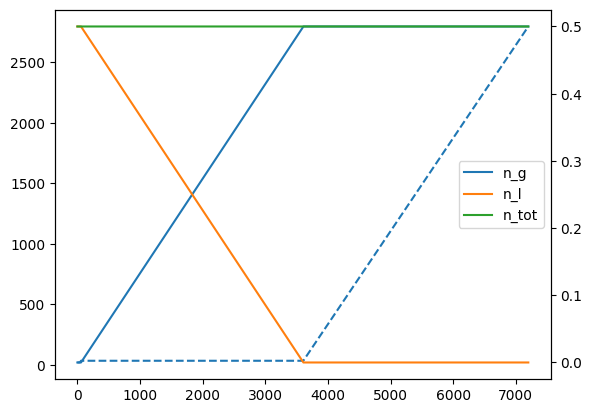

In [54]:
T_n = y[0]-273
n_g = y[1]
n_l = y[2]

fig, ax1   = plt.subplots()
ax1.plot(t,T_n, label = 'T_n'  , linestyle = '--')

ax2 = ax1.twinx()
ax2.plot(t,n_g, label = 'n_g'  )
ax2.plot(t,n_l, label = 'n_l')
ax2.plot(t,n_g+n_l, label = 'n_tot')
plt.legend()

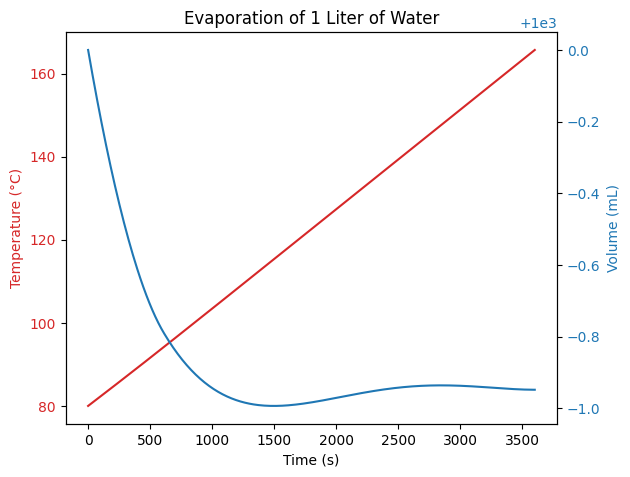

In [35]:
# GPT model of evaporation  of 1 liter of water
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

# Constants
Cp = 4.18  # Heat capacity of water in J/g°C
Lv = 2260  # Latent heat of vaporization in J/g
A = 0.01   # Surface area in m^2
heat_influx = 100  # Constant heat influx in J/s
initial_volume = 1000  # 1 liter in mL

# Differential equations
def model(t, y):
    T, V = y  # Temperature and Volume

    # Calculating evaporation rate (simplified model)
    evaporation_rate = 0.01 * A * np.maximum(100 - T, 0) * (V / initial_volume)  # g/s

    # Temperature change
    dT_dt = (heat_influx - evaporation_rate * Lv) / (Cp * V)  # Adjusted for changing volume

    # Volume change
    dV_dt = -evaporation_rate  # Negative because volume decreases

    return [dT_dt, dV_dt]

# Initial conditions
initial_conditions = [80, initial_volume]  # 80°C, 1 liter

# Time span
t_span = [0, 3600]  # 1 hour simulation

# Solve the ODE
sol = solve_ivp(model, t_span, initial_conditions, dense_output=True)

# Plotting
t = np.linspace(t_span[0], t_span[1], 300)
T, V = sol.sol(t)

fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Time (s)')
ax1.set_ylabel('Temperature (°C)', color=color)
ax1.plot(t, T, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('Volume (mL)', color=color)
ax2.plot(t, V, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()
plt.title('Evaporation of 1 Liter of Water')
plt.show()


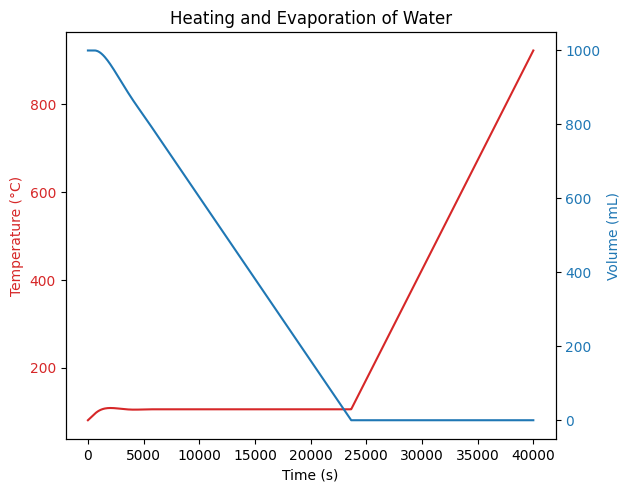

In [39]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

# Constants
Cp_water = 4.18  # Specific heat capacity of water in J/g°C
Cp_steam = 2.0   # Approximate specific heat capacity of steam in J/g°C
Lv = 2260        # Latent heat of vaporization in J/g
initial_volume = 1000  # Initial volume of water in mL (1 L)
heat_influx = 100      # Heat influx in J/s
boiling_point = 100    # Boiling point of water in °C

# Differential equations
def model(t, y):
    T, V = y  # Temperature and Volume

    if V > 0 and T < boiling_point:  # Heating liquid water
        dT_dt = heat_influx / (Cp_water * V)
        dV_dt = 0
    elif V > 0:  # Evaporating water
        dT_dt = 0
        dV_dt = -heat_influx / Lv
    else:  # Heating water vapor
        dT_dt = heat_influx / (Cp_steam * initial_volume)
        dV_dt = 0

    return [dT_dt, dV_dt]

# Initial conditions
initial_conditions = [80, initial_volume]  # Starting at 80°C, 1 liter

# Time span
t_span = [0, 40000]  # Extended time for complete evaporation and heating

# Solve the ODE
sol = solve_ivp(model, t_span, initial_conditions, dense_output=True)

# Plotting
t = np.linspace(t_span[0], t_span[1], 500)
T, V = sol.sol(t)

fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Time (s)')
ax1.set_ylabel('Temperature (°C)', color=color)
ax1.plot(t, T, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  
color = 'tab:blue'
ax2.set_ylabel('Volume (mL)', color=color)  
ax2.plot(t, V, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()
plt.title('Heating and Evaporation of Water')
plt.show()
